In [66]:
import loaddata as ld
import pandas as pd
reload(ld)
metacritic_df,movies_df = ld.load_data()

metacritic_df['title_nopunc'] = metacritic_df['title'].str.replace('[^\w\s]','')
movies_df['title_nopunc'] = movies_df['title'].str.replace('[^\w\s]','')
movies_df['title_nopunc'] = movies_df['title_nopunc'].str.lower()
metacritic_df['title_nopunc'] = metacritic_df['title_nopunc'].str.lower()
movies_df['title_nopunc'] = movies_df['title_nopunc'].str.strip()
metacritic_df['title_nopunc'] = metacritic_df['title_nopunc'].str.strip()


full_df = pd.merge(movies_df, metacritic_df, how='inner', on=['title_nopunc', 'year'], sort=True)
print len(full_df) 
print len(metacritic_df) 
print len(movies_df)


mylist =['Christopher Nolan', 'Quentin Tarantino', 'Martin Scorsese', 'Steven Spielberg', 'Woody Allen', 'Ridley Scott', 'Clint Eastwood', 'Steven Soderbergh', 'Tim Burton']
full_df.loc[~full_df.director_y.isin(mylist),'director_y'] = 'Other'
dummies = pd.get_dummies(full_df['director_y'])
new_df = pd.concat([full_df, dummies], axis=1)
new_df.info()

full_df_clean = new_df[new_df.user_score != 'tbd']
full_df_clean = full_df_clean.convert_objects(convert_numeric=True) 


3242
4765
3728
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242 entries, 0 to 3241
Data columns (total 39 columns):
alt_title               3242 non-null object
director_x              1969 non-null object
domestic_gross          3200 non-null float64
mojo_slug               3242 non-null object
opening_per_theater     3138 non-null float64
opening_weekend_take    3138 non-null float64
production_budget       1454 non-null float64
release_date_limited    272 non-null object
release_date_wide       3239 non-null object
title_x                 3242 non-null object
widest_release          3163 non-null float64
worldwide_gross         2543 non-null float64
year                    3242 non-null float64
title_nopunc            3242 non-null object
complete                3242 non-null object
director_y              3242 non-null object
genre                   3242 non-null object
metacritic_page         3242 non-null object
metascore               3166 non-null float64
num_critic_revie

c:\Users\RPM592\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [18]:
# full_df_clean = full_df_clean[full_df_clean.year>=2005]
# full_df_clean = full_df_clean[full_df_clean.rating.isin(['R', 'PG-13'])]


### Only stuff we knew before

1.28867042977
0.146966911903
0.151181639283


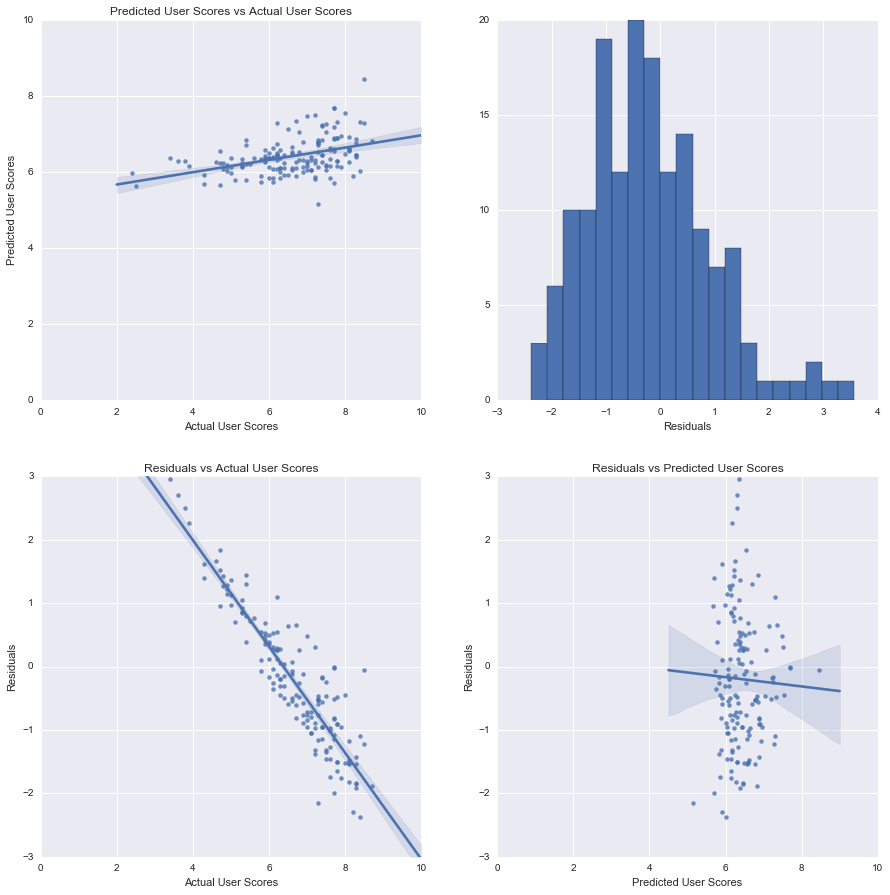

In [19]:
import numpy as np
import sklearn as sk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

# Remove Missings
full_df_nomiss = full_df_clean.dropna(subset=['production_budget','runtime_minutes','widest_release','Christopher Nolan', 'Clint Eastwood', 'Martin Scorsese', 'Other', 'Quentin Tarantino', 
                                              'Ridley Scott', 'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Woody Allen'])

inputs = full_df_nomiss[['production_budget','runtime_minutes','widest_release','Christopher Nolan', 'Clint Eastwood', 'Martin Scorsese', 'Other', 'Quentin Tarantino', 
                                              'Ridley Scott', 'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Woody Allen']]
response = full_df_nomiss['user_score']

# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(inputs, response, test_size=0.2, random_state=1)

# Fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print mean_squared_error(y_pred, y_test)
print model.score(X_test, y_test)
print model.score(X_train, y_train)



import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

resid = y_pred - y_test

plt.figure(figsize=(15,15))

ax1 = plt.subplot(221)
sns.regplot(x=y_test, y=y_pred)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Predicted User Scores vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Predicted User Scores")

ax2 = plt.subplot(222)
plt.hist(resid, bins=20)
plt.xlabel("Residuals")

ax3 = plt.subplot(223)
sns.regplot(x=y_test, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Residuals")

ax4 = plt.subplot(224)
sns.regplot(x=y_pred, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Predicted User Scores")
plt.xlabel("Predicted User Scores")
plt.ylabel("Residuals")

In [20]:
print full_df_clean.info()
print full_df_nomiss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 1 to 3241
Data columns (total 39 columns):
alt_title               1961 non-null object
director_x              1161 non-null object
domestic_gross          1934 non-null float64
mojo_slug               10 non-null float64
opening_per_theater     1911 non-null float64
opening_weekend_take    1911 non-null float64
production_budget       801 non-null float64
release_date_limited    139 non-null object
release_date_wide       1961 non-null object
title_x                 9 non-null float64
widest_release          1931 non-null float64
worldwide_gross         1695 non-null float64
year                    1961 non-null float64
title_nopunc            10 non-null float64
complete                1961 non-null bool
director_y              1961 non-null object
genre                   1961 non-null object
metacritic_page         1961 non-null object
metascore               1922 non-null float64
num_critic_reviews      1961 non-null 

### More stuff

In [70]:
full_df_clean.columns

Index([           u'alt_title',           u'director_x',
             u'domestic_gross',            u'mojo_slug',
        u'opening_per_theater', u'opening_weekend_take',
          u'production_budget', u'release_date_limited',
          u'release_date_wide',              u'title_x',
             u'widest_release',      u'worldwide_gross',
                       u'year',         u'title_nopunc',
                   u'complete',           u'director_y',
                      u'genre',      u'metacritic_page',
                  u'metascore',   u'num_critic_reviews',
           u'num_user_ratings',     u'num_user_reviews',
                     u'rating',         u'release_date',
            u'runtime_minutes',               u'studio',
                    u'title_y',   u'unable to retrieve',
                 u'user_score',    u'Christopher Nolan',
             u'Clint Eastwood',      u'Martin Scorsese',
                      u'Other',    u'Quentin Tarantino',
               u'Ridley Scott',

1.14047908768
0.458228663985
0.48081017153


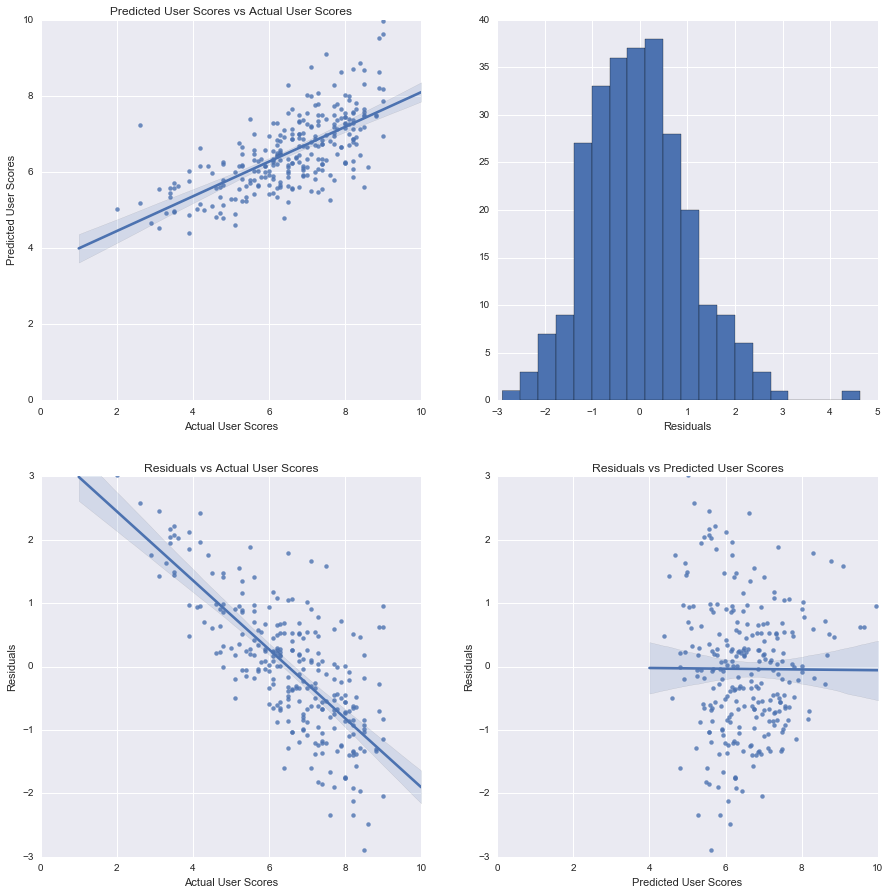

In [71]:
import numpy as np
import sklearn as sk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

# Remove Missings
full_df_nomiss = full_df_clean.dropna(subset=['user_score', 'opening_per_theater','opening_weekend_take', 'production_budget', 
                                              'worldwide_gross','year','num_user_ratings','Christopher Nolan', 'Clint Eastwood', 
                                              'Martin Scorsese', 'Other', 'Quentin Tarantino', 'Ridley Scott', 'Steven Soderbergh',
                                              'Steven Spielberg', 'Tim Burton', 'Woody Allen', 'domestic_gross','metascore', 
                                              'Action', 'Adventre', 'Biography', 'Comedy', 'Drama', 'Other_Genre'])

inputs = full_df_nomiss[['domestic_gross','opening_per_theater','opening_weekend_take', 'production_budget','worldwide_gross','year',
                         'num_user_ratings','Christopher Nolan', 'Clint Eastwood', 'Martin Scorsese', 'Other', 'Quentin Tarantino', 'Ridley Scott', 
                         'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Woody Allen', 'domestic_gross','metascore',
                        'Action', 'Adventre', 'Biography', 'Comedy', 'Drama', 'Other_Genre']]
response = full_df_nomiss['user_score']

# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(inputs, response, test_size=0.2, random_state=1)

# Fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print mean_squared_error(y_pred, y_test)
print model.score(X_test, y_test)
print model.score(X_train, y_train)



import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

resid = y_pred - y_test

plt.figure(figsize=(15,15))

ax1 = plt.subplot(221)
sns.regplot(x=y_test, y=y_pred)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Predicted User Scores vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Predicted User Scores")

ax2 = plt.subplot(222)
plt.hist(resid, bins=20)
plt.xlabel("Residuals")

ax3 = plt.subplot(223)
sns.regplot(x=y_test, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Residuals")

ax4 = plt.subplot(224)
sns.regplot(x=y_pred, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Predicted User Scores")
plt.xlabel("Predicted User Scores")
plt.ylabel("Residuals")

In [72]:
print inputs.columns
print len(inputs.columns)

Index([      u'domestic_gross',  u'opening_per_theater',
       u'opening_weekend_take',    u'production_budget',
            u'worldwide_gross',                 u'year',
           u'num_user_ratings',    u'Christopher Nolan',
             u'Clint Eastwood',      u'Martin Scorsese',
                      u'Other',    u'Quentin Tarantino',
               u'Ridley Scott',    u'Steven Soderbergh',
           u'Steven Spielberg',           u'Tim Burton',
                u'Woody Allen',       u'domestic_gross',
                  u'metascore',               u'Action',
                   u'Adventre',            u'Biography',
                     u'Comedy',                u'Drama',
                u'Other_Genre'],
      dtype='object')
25


In [68]:
lst = []
for x in full_df_clean.index:
    if len(full_df_clean.ix[x].genre) > 1:
       lst.append(full_df_clean.ix[x].genre[0]) 
    else:
        lst.append(str(full_df.ix[x].genre))
full_df_clean['genre1'] = lst
full_df_clean.genre1 = full_df_clean.genre1.astype(str)
full_df_clean.genre1 = full_df_clean.genre1.str.strip('[]')
full_df_clean.genre1 = full_df_clean.genre1.str.replace('[\'u]','')
full_df_clean.genre1 = full_df_clean.genre1.str.replace('[\']','')

full_df_clean[['genre', 'genre1']][0:4]

,genre,genre1
0,"[Comedy, Romance]",Comedy
1,"[Drama, Comedy, Romance]",Drama
2,"[Adventure, Drama, Fantasy]",Adventre
3,"[Comedy, Family]",Comedy


In [30]:
full_df_clean.genre1.value_counts().index[:6]

Index([u'Drama', u'Action', u'Comedy', u'Adventre', u'Biography', u'Thriller'], dtype='object')

In [69]:
mylist_genre = full_df_clean.genre1.value_counts().index[:6]
full_df_clean.loc[~full_df_clean.genre1.isin(mylist_genre),'genre1'] = 'Other_Genre'
dummies = pd.get_dummies(full_df_clean['genre1'])
full_df_clean = pd.concat([full_df_clean, dummies], axis=1)
full_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 3241
Data columns (total 47 columns):
alt_title               3107 non-null object
director_x              1961 non-null object
domestic_gross          3078 non-null float64
mojo_slug               10 non-null float64
opening_per_theater     3023 non-null float64
opening_weekend_take    3023 non-null float64
production_budget       1452 non-null float64
release_date_limited    270 non-null object
release_date_wide       3104 non-null object
title_x                 9 non-null float64
widest_release          3043 non-null float64
worldwide_gross         2503 non-null float64
year                    3107 non-null float64
title_nopunc            10 non-null float64
complete                3107 non-null bool
director_y              3107 non-null object
genre                   3107 non-null object
metacritic_page         3107 non-null object
metascore               3065 non-null float64
num_critic_reviews      3107 non-null

In [57]:
dummies

,Action,Adventre,Biography,Comedy,Drama,Other
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,1.0
10,0.0,0.0,0.0,0.0,1.0,0.0
